# Complex Polynomial Model

In [1]:
import numpy as np
import pandas as pd

from pystatplottools.pdf_env.loading_figure_mode import loading_figure_mode
fma, plt = loading_figure_mode(develop=True) # develop=False will export the generated figures as pngs into "./data/RectangleData"
plt.style.use('seaborn-dark-palette')

if 'root_dir' not in locals():
    # Navigate to simulations/ComplexPolynomialModel directory as simulation root directory
    import os
    os.chdir("../simulations/ComplexPolynomialModel")
    root_dir = os.getcwd()

# To be able to compute custom measures
import sys
sys.path.append("./../../python_scripts")
    
mcmc_model_dir = "ComplexPolynomialModelComplexLangevin/"
mcmc_data_dir = root_dir + "/data/" + mcmc_model_dir
mcmc_results_dir = root_dir + "/results/" + mcmc_model_dir

data_dir = root_dir + "/data/" + mcmc_model_dir
results_dir = root_dir + "/results/" + mcmc_model_dir

## MCMC Results

### Expectation Values

For the simulation with a single Markov Chain

In [2]:
from mcmctools.modes.expectation_value import load_expectation_value_results
expectation_values = load_expectation_value_results(files_dir="ComplexPolynomialModelComplexLangevin")
expectation_values

Quantity,ExpVal,Error,ExpVal,Error
Observable,Mean,Mean,SecondMoment,SecondMoment
default,,,,
default,0.004017+0.000111j,0.908277+0.176025j,0.793999-0.232881j,0.800671+0.240500j


## Data Evaluation with the pystatplottools Library

### Distribution of the Samples in the Complex Plane

In [3]:
# Load all data
from mcmctools.loading.loading import load_data

# skipcols=[] Can be used to load only certain columns of the different files
data, filenames = load_data(files_dir=mcmc_model_dir, running_parameter="default",
                            identifier="expectation_value")  # , skipcols=["Config"])
from mcmctools.utils.json import load_configs
sim_params, execution_params, running_parameter = load_configs(
    files_dir=mcmc_model_dir, mode="expectation_value", project_base_dir="./")
data

Mean              Config
default sample_num                                        
default 0           1.052408-0.168067j  1.052408-0.168067j
        1           1.058626-0.252716j  1.058626-0.252716j
        2           0.660363-0.271584j  0.660363-0.271584j
        3          -0.205618+0.093384j -0.205618+0.093384j
        4          -0.702083+0.223087j -0.702083+0.223087j
...                                ...                 ...
        99995      -0.339066+0.257569j -0.339066+0.257569j
        99996      -1.119928+0.250846j -1.119928+0.250846j
        99997      -0.422896+0.231821j -0.422896+0.231821j
        99998      -0.507142+0.267311j -0.507142+0.267311j
        99999      -0.276601+0.247812j -0.276601+0.247812j

[100000 rows x 2 columns]

In [4]:
complex_data = pd.DataFrame({"real_part": np.real(data["Config"].values),
                             "imag_part": np.imag(data["Config"].values)})

# Prepare for usage as a distribution
from pystatplottools.utils.utils import add_index_level
complex_data = add_index_level(complex_data)
complex_data

real_part  imag_part
df 0       1.052408  -0.168067
   1       1.058626  -0.252716
   2       0.660363  -0.271584
   3      -0.205618   0.093384
   4      -0.702083   0.223087
...             ...        ...
   99995  -0.339066   0.257569
   99996  -1.119928   0.250846
   99997  -0.422896   0.231821
   99998  -0.507142   0.267311
   99999  -0.276601   0.247812

[100000 rows x 2 columns]

In [5]:
from pystatplottools.distributions.joint_distribution import JointDistribution

joint_distribution = JointDistribution(data=complex_data)

range_min, range_max = joint_distribution.extract_min_max_range_values(["real_part", "imag_part"])

joint_distribution.compute(
    axes_indices=["real_part", "imag_part"],
    range_min=[-2.0, -0.4],
    range_max=[2.0, 0.4],
    nbins=[40, 40],
    statistic="probability"
)

# The histograms can be accessed via: joint_distribution.distribution or linearized.

# Transforms joint_distribution into a linear list of mid boundaries for the different bins
# and the respective statistics for the values
linearized_joint_distribution = joint_distribution.linearize(
    output_statistics_name="prob",
    dataframes_as_columns=False,
    bin_alignment="center" # Default
)
linearized_joint_distribution

Not all data points are in the given ranges


axes_and_statistics  real_part  imag_part  prob
dfs idx                                        
df  0                    -1.95      -0.39   0.0
    1                    -1.95      -0.37   0.0
    2                    -1.95      -0.35   0.0
    3                    -1.95      -0.33   0.0
    4                    -1.95      -0.31   0.0
...                        ...        ...   ...
    1595                  1.95       0.31   0.0
    1596                  1.95       0.33   0.0
    1597                  1.95       0.35   0.0
    1598                  1.95       0.37   0.0
    1599                  1.95       0.39   0.0

[1600 rows x 3 columns]

#### Visualization

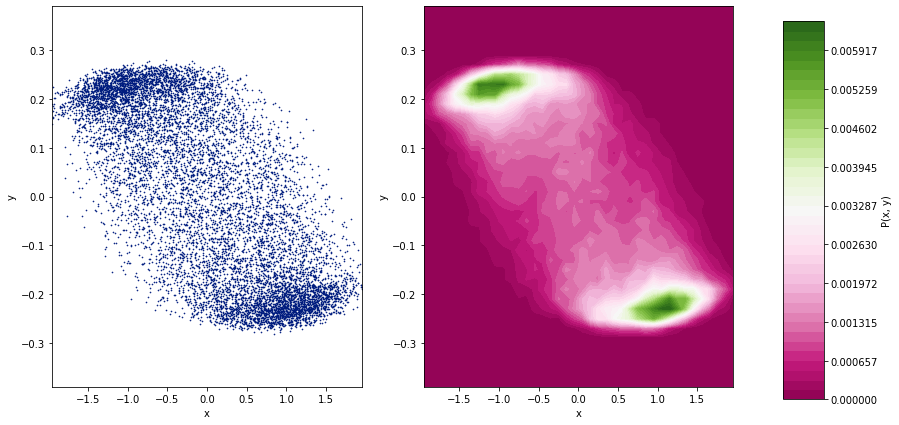

In [6]:
# Contour plot
fig, axes = fma.newfig(0.8, nrows=1, ncols=2, figsize=(14, 7))

from pystatplottools.plotting.contour2D import Contour2D

axes[0].scatter(complex_data["real_part"][:10000], complex_data["imag_part"][:10000], s=0.4)
axes[0].set_xlim(-1.95, 1.95)
axes[0].set_ylim(-0.39, 0.39)
axes[0].set_xlabel("x")
axes[0].set_ylabel("y")

contour2D = Contour2D(
    ax=axes[1],
    data=linearized_joint_distribution.loc["df"],
    x="real_part",
    y="imag_part",
    z_index="prob"
)

contour2D.set_ax_labels(x_label="x", y_label="y")
cf = contour2D.contourf(
    lev_num=40,
    cbar_scale='Lin',
    cmap="PiYG"
)

fig.subplots_adjust(right=0.8)

cax = fig.add_axes([0.85, 0.1, 0.04, 0.75])
# legend_ax.set_axis_off()

# Add additional axes
contour2D.add_colorbar(fig=fig, cf=cf, z_label="P(x, y)", cax=cax)

# plt.tight_layout()
fma.savefig(results_dir, "complex_distribution")

## Configurations as Pytorch Dataset

We show how the mcmc configurations can be stored and loaded as a .pt file.

(See also python_scripts/loading_configurations.py and python_scripts/pytorch_data_generation.py)

Currently, this only works if a running_parameter has been defined. We therefore load the data from our second simulation.

### Preparation

In [ ]:
data_generator_args = {
    # ConfigDataGenerator Args
    "data_type": "target_param",
    # Args for ConfigurationLoader
    "path": mcmc_data_dir,
    "total_number_of_data_per_file": 20000,
    "identifier": "expectation_value",
    "labels": [["Action", "", 0], ["Action", "", 1]], # Use real part and imaginary part of the action as target
    "transform": True, # Indicates that there exists a raw_transformer.py file with a transformer function in
    # the "path" + raw/ directory. The path of the raw_transformer.py file can be adpated with the parameter "transformer_path"
    "chunksize": 400  # If no chunksize is given, all data is loaded at once
}

# Prepare in memory dataset
from pystatplottools.pytorch_data_generation.data_generation.datagenerationroutines import prepare_in_memory_dataset
from mcmctools.pytorch.data_generation.datagenerationroutines import data_generator_factory

prepare_in_memory_dataset(
    root=data_dir,
    batch_size=128,
    data_generator_args=data_generator_args,
    data_generator_name="BatchConfigDataGenerator",
    data_generator_factory=data_generator_factory
)

### Generating and Loading the Dataset

In [ ]:
# Load in memory dataset
from pystatplottools.pytorch_data_generation.data_generation.datagenerationroutines import load_in_memory_dataset

# The dataset is generated and stored as a .pt file in the data_dir/data directory the first time this function is called. Otherwise the .pt is loaded.
data_loader = load_in_memory_dataset(
    root=data_dir, batch_size=128, data_generator_factory=data_generator_factory, slices=None, shuffle=True,
    num_workers=0, rebuild=False
    # sample_data_generator_name="ConfigDataGenerator"  # optional: for a generation of new samples
)

# Load training data
for batch_idx, batch in enumerate(data_loader):
    data, target = batch
    # print(batch_idx, len(data))

In [ ]:
("Config", data[0]), ("Action", target[0])